# スプライン関数

## Bスプライン関数の描画

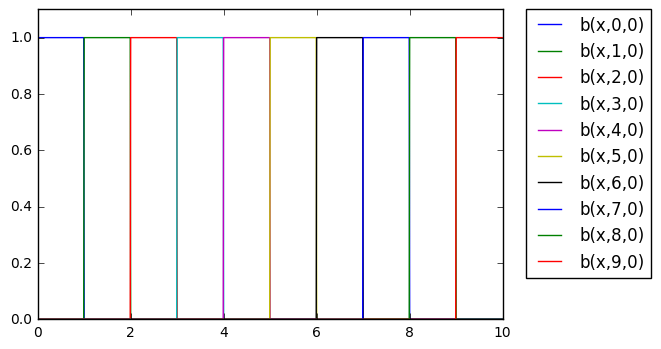

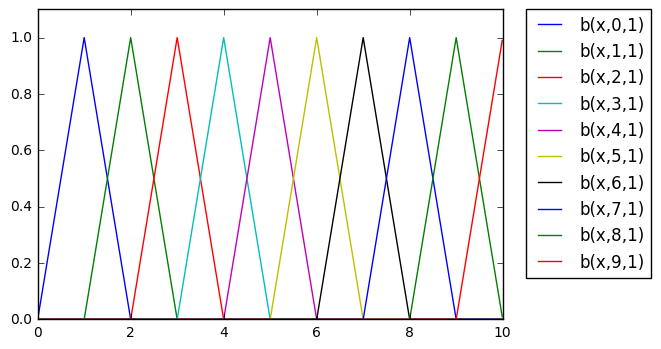

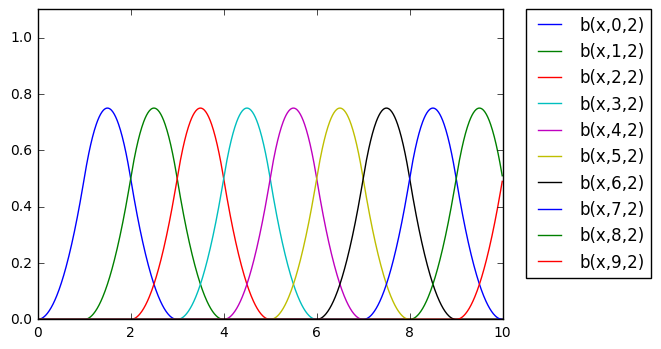

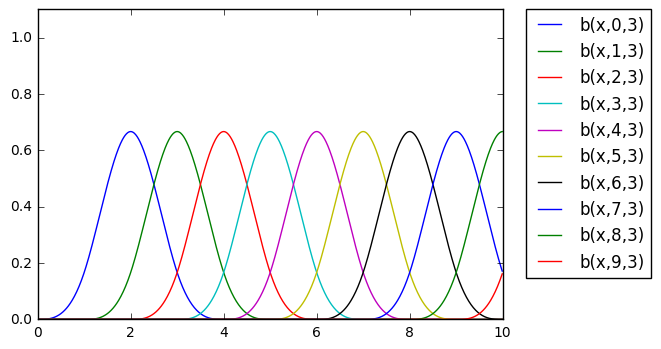

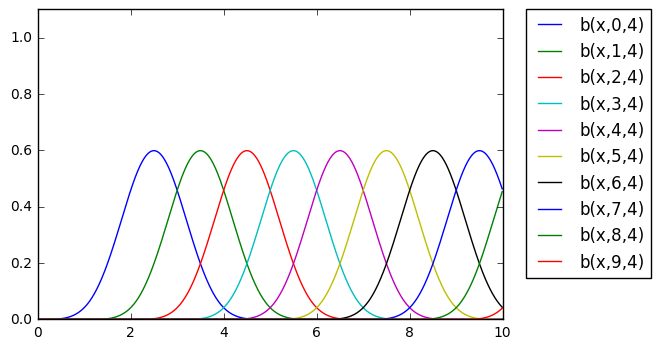

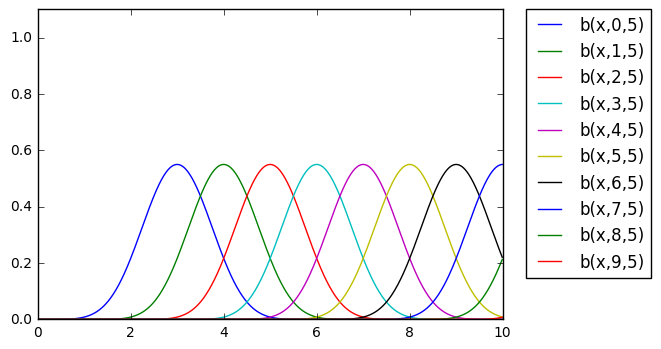

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def b(x,j,r):
    if r==0:
        if x >= j and x < j+1:
            return 1
        else:
            return 0
    else:
        return (x-j)/(j+r-j)*b(x,j,r-1)+(j+r+1-x)/(j+r+1-(j+1))*b(x,j+1,r-1)

x=np.arange(0,10,0.01)

for r in range(6):
    for j in range(10):
        y=[b(x_val,j,r) for x_val in x]
        plt.hold(True)
        plt.plot(x,y,label="b(x,%d,%d)" % (j,r))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.ylim(0,1.1)
    plt.show()
    plt.hold(False)

# 回帰分析の実験

ボストンの住宅価格データhttps://archive.ics.uci.edu/ml/datasets/Housing
に対して重回帰を行った。

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm

index=pd.DataFrame(["犯罪率","宅地の割合","非商用地の割合","チャールズ流域かどうか",
                    "窒素酸化物濃度","平均部屋数","築年数",
                    "ビジネス地区への距離","高速道路へのアクセス指数",
                    "固定資産税","学生と教師の割合","黒人の割合","低所得者の割合"],
      index=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"],
      columns=["説明変数の意味"]
           )
index

,説明変数の意味
crim,犯罪率
zn,宅地の割合
indus,非商用地の割合
chas,チャールズ流域かどうか
nox,窒素酸化物濃度
rm,平均部屋数
age,築年数
dis,ビジネス地区への距離
rad,高速道路へのアクセス指数
tax,固定資産税


In [4]:
df = pd.read_csv("Boston.csv", index_col=0)

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


medvが住宅価格の中央値である。これを目的変数とする。

In [6]:
y_tr = df.iloc[:400,  13].values #目的変数
y_test = df.iloc[400:,13].values

df = (df - df.mean())/df.std() #基準化

X_tr = df.iloc[:400, :13].values #説明変数の行列
X_test = df.iloc[400:,:13].values 


linear=lm.LinearRegression()
lasso = lm.Lasso(alpha=0.1)
ridge = lm.Ridge(alpha=0.1)

linear.fit(X_tr,y_tr)
ridge.fit(X_tr,y_tr)
lasso.fit(X_tr,y_tr)

result_coef = pd.DataFrame([linear.coef_,ridge.coef_,lasso.coef_],index = ["Linear","Ridge","Lasso"], columns=list(df.columns.values)[0:13])
result_coef



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
Linear,-1.645014,1.031529,0.378834,0.435933,-1.737669,3.434203,0.073446,-2.726490,4.221168,-2.595584,-1.750997,-0.117981,-3.698740
Ridge,-1.641838,1.029904,0.375149,0.436795,-1.734277,3.434718,0.072555,-2.724546,4.204794,-2.582164,-1.749829,-0.115637,-3.697582
Lasso,-1.115042,0.718112,-0.000000,0.457342,-1.178239,3.549197,-0.000000,-2.257989,2.300520,-1.088790,-1.568299,0.000000,-3.663439


# 推定結果についての考察

$\alpha$は平滑化パラメータである。
Lasso推定においては確かにいくつかの係数が0に落ちていることが確認できた。

# 平滑化パラメータへの依存性

$\alpha$に対する依存性をみる。

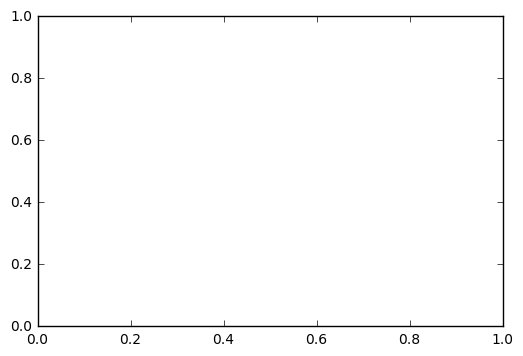

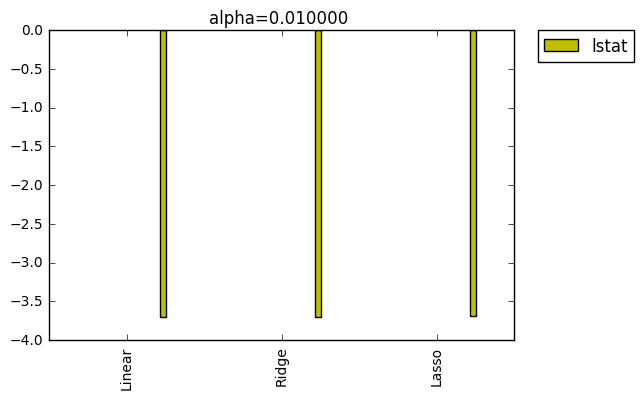

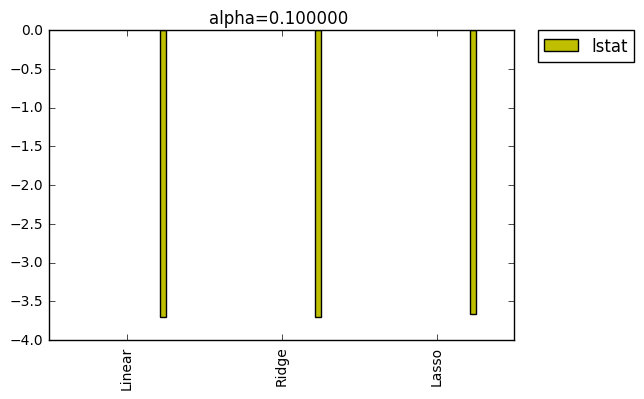

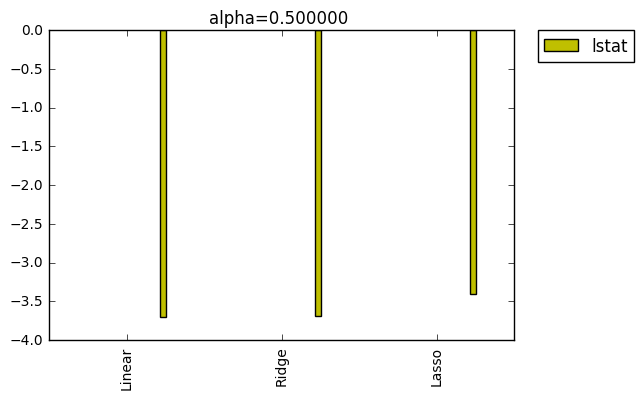

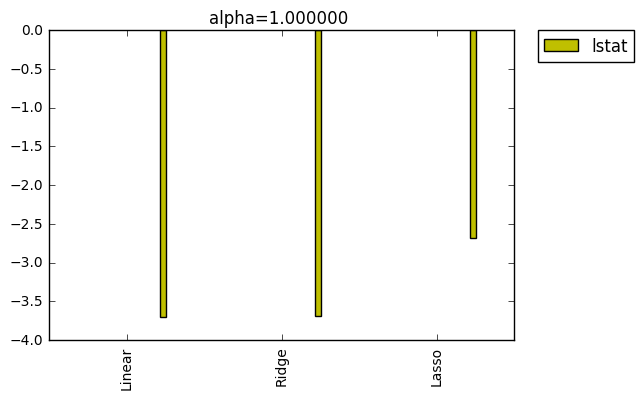

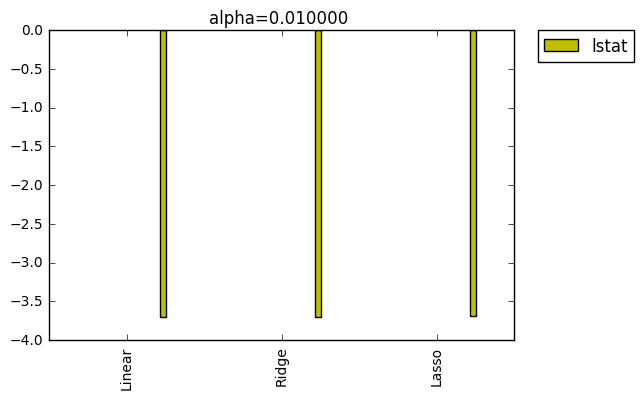

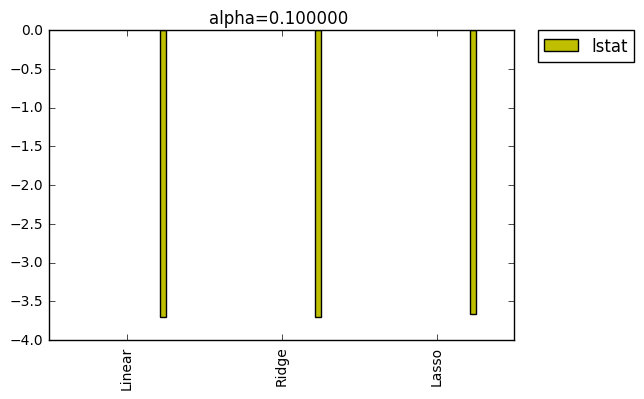

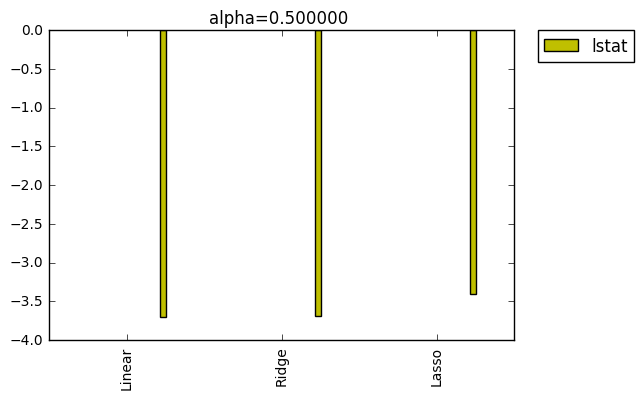

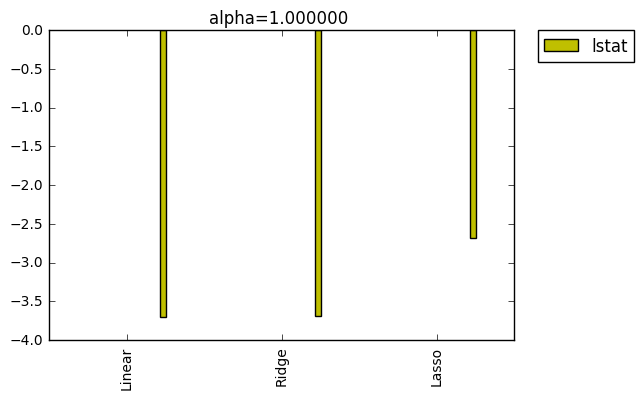

In [8]:

def plot_result(alpha):
    linear=lm.LinearRegression()
    lasso = lm.Lasso(alpha=alpha)
    ridge = lm.Ridge(alpha=alpha)
    
    linear.fit(X_tr,y_tr)
    ridge.fit(X_tr,y_tr)
    lasso.fit(X_tr,y_tr)
    
    result_coef = pd.DataFrame([linear.coef_,ridge.coef_,lasso.coef_],index = ["Linear","Ridge","Lasso"], 
                               columns=list(df.columns.values)[0:13])
    result_coef.plot.bar()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("alpha=%f " % alpha)
    
plot_result(0.01)
plot_result(0.1)
plot_result(0.5)
plot_result(1.0)
plt.show()